Center: (72.5, 319.0), Width: 560.0, Height: 145.0, Angle: 90.0


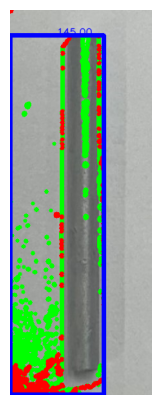

In [16]:
import cv2
import matplotlib.pyplot as plt

def detect_contour_threshold(image, background="black"):

    # convert the image to grayscle
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if background == "white":
        # Invert the colors if the background is white
        gray_inverted = cv2.bitwise_not(gray)

    #create a binary threshold image
    _, binary = cv2.threshold(gray_inverted, 100, 255, cv2.THRESH_BINARY)

    #find the contours from the thresholded image
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    #retreive the biggest contour determined by area
    biggest_contour = max(contours, key = cv2.contourArea) 

    # #draw all contours
    cv2.drawContours(image, contours, -1, (0, 255, 0), 5) # to check all contour
    cv2.drawContours(image, biggest_contour, -1, (0, 0, 255), 5) # to check all contours
    
    rect  = cv2. minAreaRect(biggest_contour) 
    (center_x, center_y), (width, height), angle = rect
    print(f"Center: ({center_x}, {center_y}), Width: {width}, Height: {height}, Angle: {angle}")


    #convert the rect object to box points  
    box = cv2.boxPoints(rect).astype('int')    # min area rect will have angle , this line of code rotate at that angle and find new cordinates [int is used to draw rectangle ]
    cv2.drawContours(image,[box], 0, (255,0,0), 5)

    # x1 = int(center_x - width / 2)
    # y1 = int(center_y - height / 2)
    # x2 = int(center_x + width / 2)
    # y2 = int(center_y + height / 2)
    font_scale = 0.5
    font = cv2.FONT_HERSHEY_SIMPLEX
    color = (255, 0, 0)  # Blue color for text
    cv2.putText(image, f"{height:.2f}", (int(center_x), int(center_y- width/2 )), font, font_scale, color, 1, cv2.LINE_AA)
    cv2.putText(image, f"{width:.2f}", (int(center_y), int(center_x - height/2)), font, font_scale, color, 1, cv2.LINE_AA)
    cv2.circle(image, (int(center_x), int(center_y)), 5, (0, 0, 255), -1)
    cv2.circle(image, (int(0), int(0)), 5, (0, 0, 255), -1)
    cv2.circle(image, (int(268), int(0)), 5, (0, 0, 255), -1)

    plt.figure(figsize=[5,5])
    plt.imshow(image[:,:,::-1]);plt.axis("off")
    

img = cv2.imread(r"c:\Users\melroy.pereira1\OneDrive - Autoliv\Documents\Autoliv\lockingbar_template.jpg")

detect_contour_threshold(img, background="white")

# (width/2) +10

# 268.5  --> height

# 179.5 --> width (this should be 180 degree rotated)

In [15]:
# template matching (match master image with the image to be measured)

import numpy as np
import cv2 
 
# load image and template in grayscale
img = cv2.imread(r"c:\Users\melroy.pereira1\OneDrive - Autoliv\Documents\Autoliv\IMG_3823.jpg", 0)
template = cv2.imread(r"c:\Users\melroy.pereira1\OneDrive - Autoliv\Documents\Autoliv\lockingbar_template.jpg", 0)

h, w, = template.shape
(height, width) = template.shape

methods = [cv2.TM_CCOEFF_NORMED, cv2.TM_CCOEFF, cv2.TM_CCORR_NORMED, cv2.TM_CCORR, cv2.TM_SQDIFF_NORMED, cv2.TM_SQDIFF]

for method in methods:
    img2 = img.copy()

    result =cv2.matchTemplate(img2, template, method)
    # (W -w + 1, H- h + 1) = result.shape  
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)  # location of the best match
    print(min_loc, max_loc)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        location = min_loc
    else:
        location = max_loc

    bottom_right = (location[0] + width, location[1] + height)
    cv2.rectangle(img2, location, bottom_right, (255, 0, 0), 10)
    img3 = cv2.resize(img2, (640, 480))
    cv2.imshow(f"Method: {method}", img3)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


(644, 2715) (1373, 1791)
(982, 598) (1253, 953)
(1167, 619) (689, 1105)
(1168, 588) (742, 0)
(20, 3183) (1165, 391)
(14, 3206) (1167, 599)


(np.float64(-0.5), np.float64(219.5), np.float64(599.5), np.float64(-0.5))

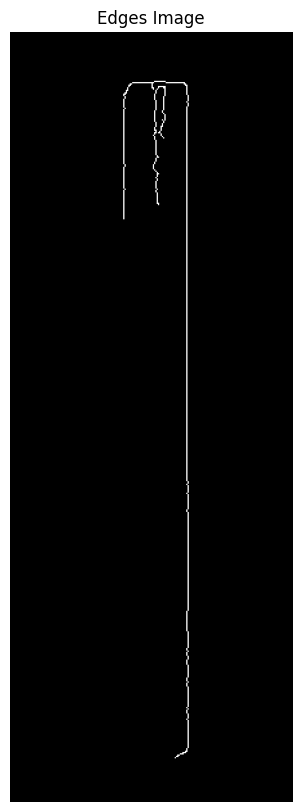

In [ ]:
# cany edge detection
img = cv2.imread(r"c:\Users\melroy.pereira1\OneDrive - Autoliv\Documents\Autoliv\lockingbar_template.jpg")
#blur the image to remove noise
blurred_image = cv2.GaussianBlur(img.copy(),(9,9), 0)

#Apply canny edge detection
edges = cv2.Canny(blurred_image, 50, 150)


#Display the resultant binary image of edges
plt.figure(figsize=[10,10])
plt.imshow(edges,cmap='gray');plt.title("Edges Image");plt.axis('off')

(np.float64(-0.5), np.float64(219.5), np.float64(599.5), np.float64(-0.5))

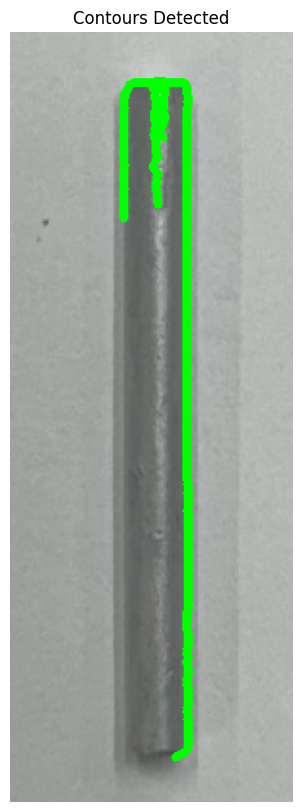

In [63]:
# detect the contour using the edges
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#retreive the biggest contour determined by area
biggest_contour = max(contours, key = cv2.contourArea) 

#draw the contour
# image3_copy = image3.copy()
cv2.drawContours(img, contours, -1, (0, 255, 0), 5)

#Display the drawn contours
plt.figure(figsize=[10,10])
plt.imshow(img[:,:,::-1]);plt.title("Contours Detected");plt.axis('off')

In [64]:
# #draw all contours
# cv2.drawContours(img, contours, -1, (0, 255, 0), 5) # to check all contour
cv2.drawContours(img, biggest_contour, -1, (0, 0, 255), 5) # to check all contours

rect  = cv2. minAreaRect(biggest_contour) 
(center_x, center_y), (width, height), angle = rect
print(f"Center: ({center_x}, {center_y}), Width: {width}, Height: {height}, Angle: {angle}")


#convert the rect object to box points  
box = cv2.boxPoints(rect).astype('int')    # min area rect will have angle , this line of code rotate at that angle and find new cordinates [int is used to draw rectangle ]
cv2.drawContours(img,[box], 0, (255,0,0), 5)


Center: (112.99998474121094, 301.49993896484375), Width: 49.99999237060547, Height: 526.9998779296875, Angle: 0.0


array([[[179, 184, 182],
        [177, 182, 180],
        [175, 180, 178],
        ...,
        [189, 192, 190],
        [190, 193, 191],
        [191, 194, 192]],

       [[178, 183, 181],
        [177, 182, 180],
        [176, 181, 179],
        ...,
        [191, 194, 192],
        [190, 193, 191],
        [190, 193, 191]],

       [[177, 182, 180],
        [177, 182, 180],
        [177, 182, 180],
        ...,
        [192, 195, 193],
        [190, 193, 191],
        [189, 192, 190]],

       ...,

       [[152, 155, 153],
        [150, 153, 151],
        [148, 151, 149],
        ...,
        [175, 178, 176],
        [175, 178, 176],
        [175, 178, 176]],

       [[153, 156, 154],
        [150, 153, 151],
        [148, 151, 149],
        ...,
        [176, 179, 177],
        [176, 179, 177],
        [176, 179, 177]],

       [[154, 157, 155],
        [151, 154, 152],
        [149, 152, 150],
        ...,
        [176, 179, 177],
        [176, 179, 177],
        [177, 180, 178]]

(np.float64(-0.5), np.float64(219.5), np.float64(599.5), np.float64(-0.5))

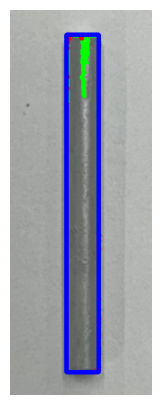

In [65]:
plt.figure(figsize=[5,5])
plt.imshow(img[:,:,::-1]);plt.axis("off")

(np.float64(-0.5), np.float64(301.5), np.float64(259.5), np.float64(-0.5))

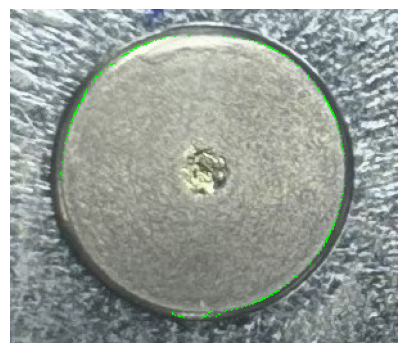

In [11]:
# template contour matching
import cv2 
import matplotlib.pyplot as plt
from contour import detect_contour_threshold, detect_edges_and_contours

template_img = cv2.imread(r"c:\Users\melroy.pereira1\OneDrive - Autoliv\Documents\Autoliv\IMG_3823_rivet.jpg")
template_contours = detect_edges_and_contours(template_img, blur_kernel=(9, 9), canny_thresh1=60, canny_thresh2=100)

biggest_contour = max(template_contours, key = cv2.contourArea)  
# template_contour = max(template_contours, key=cv2.contourArea)  # or use logic to pick the correct one
cv2.drawContours(template_img, biggest_contour, -1, (0, 255, 0), 1)
plt.figure(figsize=[5,5])
plt.imshow(template_img[:,:,::-1]);plt.axis("off")

In [12]:
import cv2

# Assume template_contour is your known contour (manually drawn or from another image)
# contours is the list of contours detected in your input image

def find_best_matching_contour(contours, template_contour):
    best_match = None
    lowest_score = float('inf')

    for cnt in contours:
        # Match shapes (Hu Moments); method=1 is one of the recommended ones
        score = cv2.matchShapes(template_contour, cnt, cv2.CONTOURS_MATCH_I1, 0.0)
        
        if score < lowest_score:
            lowest_score = score
            best_match = cnt
    
    return best_match, lowest_score


Best match score: 0.3879512864723591


(np.float64(-0.5), np.float64(301.5), np.float64(259.5), np.float64(-0.5))

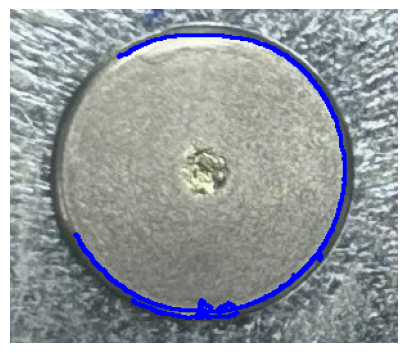

In [17]:
# Step 1: Get template contour from known shape
template_contour = biggest_contour

input_image = cv2.imread(r"c:\Users\melroy.pereira1\OneDrive - Autoliv\Documents\Autoliv\IMG_3823_rivet.jpg")
# Step 2: Get contours from your input image
contours = detect_edges_and_contours(input_image)

# Step 3: Match each with template and get best match
best_match, score = find_best_matching_contour(contours, template_contour)

print(f"Best match score: {score}")
# Optional: draw best match
cv2.drawContours(input_image, [best_match], -1, (255, 0, 0), 2)
# cv2.imshow("Matched Contour", input_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=[5,5])
plt.imshow(input_image[:,:,::-1]);plt.axis("off")


(np.float64(-0.5), np.float64(219.5), np.float64(599.5), np.float64(-0.5))

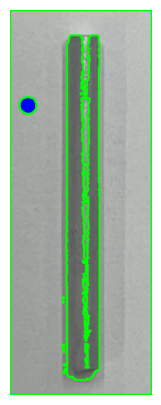

In [123]:
contours = detect_contour_threshold(input_image)
cv2.drawContours(input_image, contours, -1, (0, 255, 0), 2)
plt.figure(figsize=[5,5])
plt.imshow(input_image[:,:,::-1]);plt.axis("off")

: 